# Data Wrangling

## Missing values

Missing values occur when no data value is stored for a feature in an observation.

#### Dealing with missing data:
 - Check with data collection source
 - Drop the missing value
 - Replace the missing value (with an average or with the most frequent value)
 - Leave it as missing

#### How to drop value in Python
df.dropna() method

Usage:
df.dropna(subset=["column name"], axis=0, inplace=True)

#### Using replace
df["column name"].replace(missing_value, new_value)

## Data Formatting
Data are usually collected from different sources. Data formatting ensures the data is consistent and easily understandable.

For example, standardize measuring units and abbreviatures.

## Data Normalization

Uniform features values with different ranges.

|   Age  |    Income    |
|--------|--------------|
|   25   |     70000    |
|   35   |     90000    |
|   45   |    120000    |

In this example, features are harder to compare and 'Income' may influence the result more.
***

|   Age  |    Income    |
|--------|--------------|
|   2.5   |     7    |
|   3.5   |     9    |
|   4.5   |    12    |

A normalized dataset have similar ranges.
***

#### Normalizarion methods
 - Simple feature scaling -> $ x_{new} = x_{old} / x_{max} $
 - Min-Max -> $ x_{new} = (x_{old} - x_{min}) / (x_{max} - x_{min})  $
 - Z-score -> $ x_{new} = (x_{old} - \mu) / \sigma  $
 


## Binning

Binning is used to group features in similar ranges.

For example,

| value | category |
|-------|----------|
|0 to 5000 | low |
| 5000 to 15000 | medium |
| 15000 to 30000 | high |

## Turning Categorical to Numeric Features

Whenever a feature is presented as categories, it should be separated in different columns and set a value to represent its category.

| Car | Fuel | gas | diesel |
|-----|------|-----|--------|
| A | gas | 1 | 0 |
| B | diesel | 0 | 1 |
| C | gas | 1 | 0 |
| D | gas | 1 | 0 |

This technique is called one-hot encoding.

Usage:

pandas.get_dummies(df['Fuel'])

***

# Practice

 - Dataset location: https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
 - File format: csv

In [12]:
import pandas as pd
import matplotlib.pylab as plt

In [13]:
filename = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
# dataset was provided without headers
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Convert "?" to NaN

In [14]:
import numpy as np
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for missing data

In [15]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Count missing data in each column

In [16]:
for column in missing_data.columns.values.tolist():
    # Check if there is any value set to 'True' in column
    if (True in missing_data[column].unique()):
        print(column)
        # Count how many 'True' values
        count = missing_data[column].value_counts()
        # value_counts() returns a list [False, True]
        print(count[1], "missing data")
        print("")

normalized-losses
41 missing data

num-of-doors
2 missing data

bore
4 missing data

stroke
4 missing data

horsepower
2 missing data

peak-rpm
2 missing data

price
4 missing data



#### Deal with missing data
##### Replace by mean:
 - normalized-losses
 - bore
 - stroke
 - horsepower
 - peak-rpm

##### Replace by frequency:
 - num-of-doors
     - Reason: majority of cars in dataset have four doors
     
##### Drop the whole row:
 - price
     - Reason: price is what we want to predict. Any row without price is not useful.

In [17]:
mean_replaced = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]

def replace_by_mean(replace_list):
    for column in replace_list:
        # convert to float and calculate average
        avg_value = df[column].astype("float").mean(axis=0)
        print("Average of", column, ":", avg_value)
        # replace missing values with average
        df[column].replace(np.nan, avg_value, inplace=True)

replace_by_mean(mean_replaced)

Average of normalized-losses : 122.0
Average of bore : 3.3297512437810943
Average of stroke : 3.255422885572139
Average of horsepower : 104.25615763546799
Average of peak-rpm : 5125.369458128079


In [18]:
# replace the missing 'num-of-doors' by the most frequent
# find the most frequent
df['num-of-doors'].describe(include=['object'])

count      203
unique       2
top       four
freq       114
Name: num-of-doors, dtype: object

In [19]:
# replace the missing 'num-of-doors' by the most frequent
df["num-of-doors"].replace(np.nan, "four", inplace=True)

In [20]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [21]:
# drop 'price' rows with missing data
df.dropna(subset=["price"], axis=0, inplace=True)

# reset index because rows were dropped
df.reset_index(drop=True, inplace=True)

In [22]:
# check if there is any missing data remaining
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    # Check if there is any value set to 'True' in column
    if (True in missing_data[column].unique()):
        print(column)
        # Count how many 'True' values
        count = missing_data[column].value_counts()
        # value_counts() returns a list [False, True]
        print(count[1], "missing data")
        print("")

In [23]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct data format

In [24]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Convert data types to proper format

In [25]:
df[["bore", "stroke", "price", "peak-rpm"]] = df[["bore", "stroke", "price", "peak-rpm"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")

In [26]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Standardization

Standardization is the process of transforming data into a common format which allows the researcher to make meaninful comparisons.

For example, transform mpg to L/100km.

The formula for unit conversion is L/100km = 235 / mpg

In [27]:
# convert city-mpg and highway-mpg to L/100km
df["city-L/100km"] = 235 / df["city-mpg"]
df["highway-L/100km"] = 235 / df["highway-mpg"]

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization

We're going to normalize the columns 'length', 'width' and 'height' so their value ranges from 0 to 1 applying simple feature scaling.

In [28]:
df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

## Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

We're going to bin the column 'horsepower' in three categories.

In [29]:
# convert data to correct format
df['horsepower'] = df['horsepower'].astype(int, copy=True)

Text(0.5, 1.0, 'horsepower distribution')

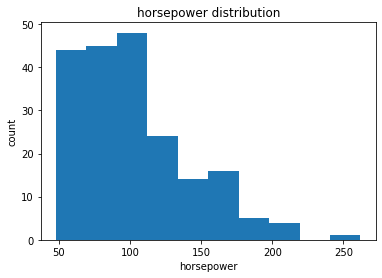

In [30]:
# plot horsepower histogram to see what its distibution looks like
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

# set x and y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower distribution")

In [31]:
# create 3 bins from min to max horsepower
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [32]:
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)

df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [33]:
df['horsepower-binned'].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower distribution')

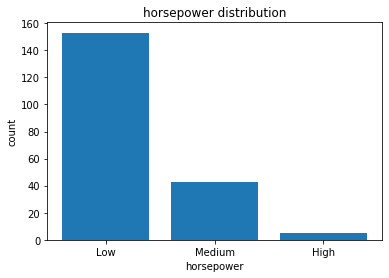

In [34]:
# plot the distribution of each bin
plt.pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# set x and y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower distribution")

Text(0.5, 1.0, 'horsepower distribution')

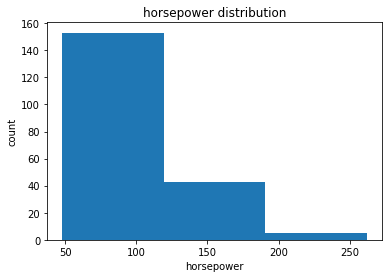

In [35]:
plt.pyplot.hist(df['horsepower'], bins = 3)

# set x and y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower distribution")

## Indicator Variable

An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [36]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [37]:
dummy = pd.get_dummies(df['fuel-type'])
dummy.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [38]:
dummy.rename(columns={'diesel':'fuel-type-diesel', 'gas':'fuel-type-gas'}, inplace=True)
dummy.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [39]:
# merge dummy to original dataframe
df = pd.concat([df, dummy], axis = 1)

# drop original column 'fuel-type'
df.drop("fuel-type", axis = 1, inplace=True)

In [40]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [41]:
dummy = pd.get_dummies(df['aspiration'], prefix='aspiration', prefix_sep='-')
dummy.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
df = pd.concat([df, dummy], axis = 1)
df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


In [43]:
df.to_csv('clean_df.csv')